# **REDES NEURAIS ARTIFICIAIS: CLASSIFICAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('heart.csv',sep=',', encoding='iso-8859-1')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



In [6]:
df.shape

(918, 12)

**Resultados**

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

## **Transformando as classes strings em variáveis categóricas ordinais**

In [7]:
df2 = pd.DataFrame.copy(df)

In [8]:
df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

In [9]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


In [10]:
df2.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [11]:
df2.shape

(918, 12)

## **ATRIBUTOS PREVISORES E ALVO**

In [12]:
previsores = df2.iloc[:, 0:11].values


In [13]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [14]:
previsores.shape

(918, 11)

In [15]:
alvo = df.iloc[:, 11].values

In [16]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
alvo.shape

(918,)

## **Análise das escalas dos atributos (Escalonamento)**

In [18]:
df2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [19]:
from sklearn.preprocessing import StandardScaler

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [21]:
previsores_esc

array([[-1.4331398 , -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239, -1.05211381],
       [-0.47848359,  1.93816322, -0.27042192, ..., -0.8235563 ,
         0.10566353,  0.59607813],
       [-1.75135854, -0.51595242, -1.34508565, ..., -0.8235563 ,
        -0.83243239, -1.05211381],
       ...,
       [ 0.37009972, -0.51595242,  0.80424181, ...,  1.21424608,
         0.29328271,  0.59607813],
       [ 0.37009972,  1.93816322, -1.34508565, ..., -0.8235563 ,
        -0.83243239,  0.59607813],
       [-1.64528563, -0.51595242, -0.27042192, ..., -0.8235563 ,
        -0.83243239, -1.05211381]])

In [22]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.433140,-0.515952,-1.345086,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.052114
1,-0.478484,1.938163,-0.270422,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.596078
2,-1.751359,-0.515952,-1.345086,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.052114
3,-0.584556,1.938163,0.804242,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.596078
4,0.051881,-0.515952,-0.270422,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-0.515952,-2.419749,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,0.596078
914,1.536902,-0.515952,0.804242,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,0.596078
915,0.370100,-0.515952,0.804242,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,0.596078
916,0.370100,1.938163,-1.345086,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,0.596078


In [23]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.083616e-16,7.740117e-18,1.935029e-17,1.954380e-16,0.000000,-3.096047e-17,0.000000,4.953675e-16,-3.870058e-18,1.238419e-16,-7.740117e-17
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-5.159524e-01,-2.419749e+00,-7.154995e+00,-1.818435,-5.513413e-01,-0.749180,-3.018469e+00,-8.235563e-01,-3.271482e+00,-1.052114e+00
25%,-6.906294e-01,-5.159524e-01,-2.704219e-01,-6.699346e-01,-0.233704,-5.513413e-01,-0.749180,-6.605778e-01,-8.235563e-01,-8.324324e-01,-1.052114e+00
50%,5.188098e-02,-5.159524e-01,8.042418e-01,-1.295128e-01,0.221363,-5.513413e-01,-0.749180,4.678968e-02,-8.235563e-01,-2.695748e-01,5.960781e-01
75%,6.883185e-01,-5.159524e-01,8.042418e-01,4.109089e-01,0.623835,-5.513413e-01,0.492241,7.541571e-01,1.214246e+00,5.747115e-01,5.960781e-01
max,2.491558e+00,1.938163e+00,8.042418e-01,3.653439e+00,3.697252,1.813758e+00,1.733661,2.561874e+00,1.214246e+00,4.983762e+00,2.244270e+00


## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
previsores2 = df.iloc[:, 0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [27]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores[:,1])

In [28]:
previsores2

array([[40, 0, 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 1, 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 0, 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 0, 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 1, 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 0, 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [29]:
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

In [30]:
previsores2

array([[40, 0, 1, ..., 0, 0.0, 2],
       [49, 1, 2, ..., 0, 1.0, 1],
       [37, 0, 1, ..., 0, 0.0, 2],
       ...,
       [57, 0, 0, ..., 1, 1.2, 1],
       [57, 1, 1, ..., 0, 0.0, 1],
       [38, 0, 2, ..., 0, 0.0, 2]], dtype=object)

In [31]:
previsores2.shape

(918, 11)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

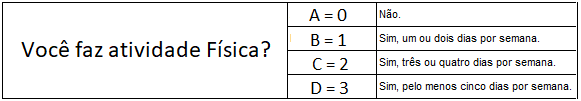

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [34]:
previsores3

array([[1.0, 0.0, 0.0, ..., 0, 172, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 156, 1.0],
       [1.0, 0.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [1.0, 0.0, 1.0, ..., 0, 115, 1.2],
       [0.0, 1.0, 0.0, ..., 0, 174, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [35]:
previsores3.shape

(918, 20)

In [36]:
previsores3df = pd.DataFrame(previsores3)
previsores3df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289,0,172,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180,0,156,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283,0,98,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214,0,108,1.5
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195,0,122,0.0


In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **Escalonamento**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [40]:
previsores3_esc

array([[ 0.51595242, -0.51595242, -1.08413811, ..., -0.55134134,
         1.38292822, -0.83243239],
       [-1.93816322,  1.93816322, -1.08413811, ..., -0.55134134,
         0.75415714,  0.10566353],
       [ 0.51595242, -0.51595242, -1.08413811, ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [ 0.51595242, -0.51595242,  0.9223917 , ..., -0.55134134,
        -0.85706875,  0.29328271],
       [-1.93816322,  1.93816322, -1.08413811, ..., -0.55134134,
         1.4615246 , -0.83243239],
       [ 0.51595242, -0.51595242, -1.08413811, ..., -0.55134134,
         1.42222641, -0.83243239]])

In [41]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.515952,-0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-1.938163,1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,0.515952,-0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-1.938163,1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.515952,-0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.515952,-0.515952,-1.084138,-0.481887,-0.532838,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283
914,0.515952,-0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094
915,0.515952,-0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283
916,-1.938163,1.938163,-1.084138,2.075177,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432


In [42]:
previsores3df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,7.740117e-18,-7.740117e-18,-1.548023e-16,-9.288140e-17,6.192094e-17,7.740117e-18,1.238419e-16,9.288140e-17,0.000000,7.740117e-17,-7.740117e-18,-7.740117e-18,4.644070e-17,-6.192094e-17,-1.238419e-16,1.896329e-16,3.096047e-17,5.418082e-17,5.108477e-16,-1.548023e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-1.938163e+00,-5.159524e-01,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-2.706015e+00,-7.154995e+00,-1.818435e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00
25%,5.159524e-01,-5.159524e-01,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-6.906294e-01,-6.699346e-01,-2.337038e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01
50%,5.159524e-01,-5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,-8.235563e-01,-2.714484e-01,9.978237e-01,-8.690559e-01,5.188098e-02,-1.295128e-01,2.213632e-01,-5.513413e-01,4.678968e-02,-2.695748e-01
75%,5.159524e-01,-5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,1.214246e+00,-2.714484e-01,9.978237e-01,1.150674e+00,6.883185e-01,4.109089e-01,6.238346e-01,-5.513413e-01,7.541571e-01,5.747115e-01
max,5.159524e-01,1.938163e+00,9.223917e-01,2.075177e+00,1.876744e+00,4.353909e+00,1.970528e+00,8.142748e-01,2.038947,8.235563e-01,1.214246e+00,3.683942e+00,9.978237e-01,1.150674e+00,2.491558e+00,3.653439e+00,3.697252e+00,1.813758e+00,2.561874e+00,4.983762e+00


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

## **BASE DE TREINO E TESTE**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [45]:
x_treino.shape

(642, 11)

In [46]:
x_teste.shape

(276, 11)

In [47]:
y_treino.shape

(642,)

In [48]:
y_teste.shape

(276,)

# **CRIAÇÃO DO ALGORITMO**

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
MLPClassifier?

Parâmetros MLPClassifier   
- hidden_layer_sizes (camadas escondidas): default (100,)   

  Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios   
  Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios
- activation: Função de ativação default='relu' 
- solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).
- alpha:  parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.
- batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.
- learning_rate: taxa de aprendizagem. default='constant'. Três tipos:   
  1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.   
  2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t  
  3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.
- learning_rate_init: taxa de aprendizagem inicial. Default=0.001
- max_iter int: Número máximo de iterações. default = 200.  ('sgd', 'adam').
- max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000
- shuffle: default = True
Usado apenas quando solver = 'sgd' ou 'adam'.
- random_state: default = None
- tol:Tolerância para a otimização.Default=0.0001
- momentum: otimização do algoritmo 'sgd'. Default: 0.9.
- n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'
- verbose : Mostra o progresso. default=False.



In [51]:
redes = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)
                               

In [52]:
redes.fit(x_treino, y_treino)

Iteration 1, loss = 0.82896546
Iteration 2, loss = 0.81711719
Iteration 3, loss = 0.80491417
Iteration 4, loss = 0.79389804
Iteration 5, loss = 0.78268139
Iteration 6, loss = 0.77188629
Iteration 7, loss = 0.76111413
Iteration 8, loss = 0.75089256
Iteration 9, loss = 0.74103055
Iteration 10, loss = 0.73130898
Iteration 11, loss = 0.72202702
Iteration 12, loss = 0.71315001
Iteration 13, loss = 0.70453432
Iteration 14, loss = 0.69599014
Iteration 15, loss = 0.68793468
Iteration 16, loss = 0.67998596
Iteration 17, loss = 0.67232441
Iteration 18, loss = 0.66465333
Iteration 19, loss = 0.65764256
Iteration 20, loss = 0.65064877
Iteration 21, loss = 0.64403270
Iteration 22, loss = 0.63742088
Iteration 23, loss = 0.63098436
Iteration 24, loss = 0.62489099
Iteration 25, loss = 0.61872779
Iteration 26, loss = 0.61279762
Iteration 27, loss = 0.60685334
Iteration 28, loss = 0.60104721
Iteration 29, loss = 0.59520197
Iteration 30, loss = 0.58974207
Iteration 31, loss = 0.58442514
Iteration 32, los

Iteration 362, loss = 0.30577075
Iteration 363, loss = 0.30565078
Iteration 364, loss = 0.30550078
Iteration 365, loss = 0.30537608
Iteration 366, loss = 0.30521858
Iteration 367, loss = 0.30502576
Iteration 368, loss = 0.30484210
Iteration 369, loss = 0.30469261
Iteration 370, loss = 0.30453822
Iteration 371, loss = 0.30436156
Iteration 372, loss = 0.30418587
Iteration 373, loss = 0.30406838
Iteration 374, loss = 0.30388801
Iteration 375, loss = 0.30378478
Iteration 376, loss = 0.30356422
Iteration 377, loss = 0.30339530
Iteration 378, loss = 0.30320376
Iteration 379, loss = 0.30299857
Iteration 380, loss = 0.30281098
Iteration 381, loss = 0.30258241
Iteration 382, loss = 0.30242598
Iteration 383, loss = 0.30225070
Iteration 384, loss = 0.30210494
Iteration 385, loss = 0.30191111
Iteration 386, loss = 0.30174627
Iteration 387, loss = 0.30154025
Iteration 388, loss = 0.30140935
Iteration 389, loss = 0.30120041
Iteration 390, loss = 0.30106317
Iteration 391, loss = 0.30088578
Iteration 

MLPClassifier(hidden_layer_sizes=7, max_iter=800, random_state=3, verbose=True)

In [53]:
previsoes = redes.predict(x_teste)

In [54]:
previsoes

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes) * 100.0))

Acurácia: 87.68%


In [57]:
confusion_matrix(y_teste, previsoes)

array([[ 92,  21],
       [ 13, 150]])

In [58]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       113
           1       0.88      0.92      0.90       163

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



**Análise dados de treino**

In [62]:
previsoes_treino = redes.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,

In [63]:
accuracy_score(y_treino, previsoes_treino)

0.8878504672897196

In [64]:
confusion_matrix(y_treino, previsoes_treino)

array([[253,  44],
       [ 28, 317]])

### **Validação Cruzada**

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [67]:
# Criando o modelo
modelo = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Iteration 1, loss = 15.55094970
Iteration 2, loss = 15.49334482
Iteration 3, loss = 15.43453685
Iteration 4, loss = 15.37016845
Iteration 5, loss = 15.31698708
Iteration 6, loss = 15.22849484
Iteration 7, loss = 15.09337121
Iteration 8, loss = 14.88703182
Iteration 9, loss = 14.54355534
Iteration 10, loss = 14.02517269
Iteration 11, loss = 13.31297533
Iteration 12, loss = 12.41951583
Iteration 13, loss = 11.29519391
Iteration 14, loss = 9.99999065
Iteration 15, loss = 8.64943447
Iteration 16, loss = 7.30088811
Iteration 17, loss = 6.10822146
Iteration 18, loss = 5.05801426
Iteration 19, loss = 4.30102510
Iteration 20, loss = 3.74531431
Iteration 21, loss = 3.45550528
Iteration 22, loss = 3.24120996
Iteration 23, loss = 3.11863488
Iteration 24, loss = 3.01742084
Iteration 25, loss = 2.94673700
Iteration 26, loss = 2.88601806
Iteration 27, loss = 2.84036757
Iteration 28, loss = 2.80116434
Iteration 29, loss = 2.76004288
Iteration 30, loss = 2.73116186
Iteration 31, loss = 2.69999120
Iter

Iteration 7, loss = 15.11983186
Iteration 8, loss = 14.91428791
Iteration 9, loss = 14.55901570
Iteration 10, loss = 14.03946655
Iteration 11, loss = 13.34980883
Iteration 12, loss = 12.45526932
Iteration 13, loss = 11.38244163
Iteration 14, loss = 10.02680593
Iteration 15, loss = 8.67795758
Iteration 16, loss = 7.34033499
Iteration 17, loss = 6.12703361
Iteration 18, loss = 5.05285849
Iteration 19, loss = 4.31607161
Iteration 20, loss = 3.74810680
Iteration 21, loss = 3.43467605
Iteration 22, loss = 3.21222336
Iteration 23, loss = 3.08188679
Iteration 24, loss = 2.97470972
Iteration 25, loss = 2.91524787
Iteration 26, loss = 2.85410966
Iteration 27, loss = 2.80976475
Iteration 28, loss = 2.77475971
Iteration 29, loss = 2.73811736
Iteration 30, loss = 2.70761291
Iteration 31, loss = 2.67523291
Iteration 32, loss = 2.64765320
Iteration 33, loss = 2.62668742
Iteration 34, loss = 2.60021644
Iteration 35, loss = 2.57635686
Iteration 36, loss = 2.55233090
Iteration 37, loss = 2.52882902
Ite

Iteration 304, loss = 0.38605664
Iteration 305, loss = 0.38354025
Iteration 306, loss = 0.38392338
Iteration 307, loss = 0.38272815
Iteration 308, loss = 0.38278438
Iteration 309, loss = 0.38595539
Iteration 310, loss = 0.38466733
Iteration 311, loss = 0.38548244
Iteration 312, loss = 0.38264913
Iteration 313, loss = 0.38382154
Iteration 314, loss = 0.38166760
Iteration 315, loss = 0.38392583
Iteration 316, loss = 0.38171326
Iteration 317, loss = 0.38348848
Iteration 318, loss = 0.38523039
Iteration 319, loss = 0.38246701
Iteration 320, loss = 0.38190167
Iteration 321, loss = 0.38379480
Iteration 322, loss = 0.38854070
Iteration 323, loss = 0.38091222
Iteration 324, loss = 0.38079883
Iteration 325, loss = 0.38432437
Iteration 326, loss = 0.38854225
Iteration 327, loss = 0.38913584
Iteration 328, loss = 0.39151729
Iteration 329, loss = 0.39132154
Iteration 330, loss = 0.38879375
Iteration 331, loss = 0.38888595
Iteration 332, loss = 0.38197943
Iteration 333, loss = 0.38347900
Iteration 

Iteration 258, loss = 0.41130569
Iteration 259, loss = 0.41839787
Iteration 260, loss = 0.41258374
Iteration 261, loss = 0.40536423
Iteration 262, loss = 0.41645142
Iteration 263, loss = 0.40962321
Iteration 264, loss = 0.40870808
Iteration 265, loss = 0.40732780
Iteration 266, loss = 0.40611157
Iteration 267, loss = 0.40539703
Iteration 268, loss = 0.40594665
Iteration 269, loss = 0.40768614
Iteration 270, loss = 0.41224010
Iteration 271, loss = 0.40912916
Iteration 272, loss = 0.40676853
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15.67109767
Iteration 2, loss = 15.62287959
Iteration 3, loss = 15.56389746
Iteration 4, loss = 15.50143988
Iteration 5, loss = 15.42281264
Iteration 6, loss = 15.32602724
Iteration 7, loss = 15.18945490
Iteration 8, loss = 14.98832299
Iteration 9, loss = 14.65258549
Iteration 10, loss = 14.19069350
Iteration 11, loss = 13.48617703
Iteration 12, loss = 12.59181539
Iteration 13, loss = 11.4264

Iteration 295, loss = 0.40413580
Iteration 296, loss = 0.39506675
Iteration 297, loss = 0.39650932
Iteration 298, loss = 0.39177403
Iteration 299, loss = 0.39183748
Iteration 300, loss = 0.39541825
Iteration 301, loss = 0.39365051
Iteration 302, loss = 0.39013998
Iteration 303, loss = 0.39168352
Iteration 304, loss = 0.39171378
Iteration 305, loss = 0.39011669
Iteration 306, loss = 0.39077984
Iteration 307, loss = 0.39037110
Iteration 308, loss = 0.39053168
Iteration 309, loss = 0.39217624
Iteration 310, loss = 0.39470247
Iteration 311, loss = 0.40016188
Iteration 312, loss = 0.39278985
Iteration 313, loss = 0.38776714
Iteration 314, loss = 0.39240086
Iteration 315, loss = 0.39283212
Iteration 316, loss = 0.39931493
Iteration 317, loss = 0.38879262
Iteration 318, loss = 0.39249244
Iteration 319, loss = 0.38919817
Iteration 320, loss = 0.38890145
Iteration 321, loss = 0.38815616
Iteration 322, loss = 0.38758024
Iteration 323, loss = 0.38764090
Iteration 324, loss = 0.38773646
Iteration 

Iteration 252, loss = 0.40701481
Iteration 253, loss = 0.40541682
Iteration 254, loss = 0.40438940
Iteration 255, loss = 0.40459538
Iteration 256, loss = 0.41290536
Iteration 257, loss = 0.40676246
Iteration 258, loss = 0.40933871
Iteration 259, loss = 0.40375545
Iteration 260, loss = 0.40634637
Iteration 261, loss = 0.40975174
Iteration 262, loss = 0.40480284
Iteration 263, loss = 0.41080848
Iteration 264, loss = 0.40873979
Iteration 265, loss = 0.41072883
Iteration 266, loss = 0.40707817
Iteration 267, loss = 0.40236905
Iteration 268, loss = 0.40407134
Iteration 269, loss = 0.40467292
Iteration 270, loss = 0.40236324
Iteration 271, loss = 0.40652307
Iteration 272, loss = 0.40215513
Iteration 273, loss = 0.40276370
Iteration 274, loss = 0.40125966
Iteration 275, loss = 0.40309030
Iteration 276, loss = 0.40151191
Iteration 277, loss = 0.40785416
Iteration 278, loss = 0.40724906
Iteration 279, loss = 0.40673172
Iteration 280, loss = 0.41127142
Iteration 281, loss = 0.40942726
Iteration 

Iteration 225, loss = 0.42262402
Iteration 226, loss = 0.42131277
Iteration 227, loss = 0.42281197
Iteration 228, loss = 0.42185987
Iteration 229, loss = 0.41984630
Iteration 230, loss = 0.41779413
Iteration 231, loss = 0.41860821
Iteration 232, loss = 0.42440208
Iteration 233, loss = 0.42509862
Iteration 234, loss = 0.41948589
Iteration 235, loss = 0.42265244
Iteration 236, loss = 0.42327479
Iteration 237, loss = 0.41467000
Iteration 238, loss = 0.41474687
Iteration 239, loss = 0.42228211
Iteration 240, loss = 0.41328034
Iteration 241, loss = 0.41252880
Iteration 242, loss = 0.41328812
Iteration 243, loss = 0.41207927
Iteration 244, loss = 0.41131362
Iteration 245, loss = 0.41250510
Iteration 246, loss = 0.41327272
Iteration 247, loss = 0.41638432
Iteration 248, loss = 0.41319153
Iteration 249, loss = 0.41248024
Iteration 250, loss = 0.41168183
Iteration 251, loss = 0.41573193
Iteration 252, loss = 0.40937654
Iteration 253, loss = 0.40788071
Iteration 254, loss = 0.40953503
Iteration 

Iteration 205, loss = 0.41311995
Iteration 206, loss = 0.41610744
Iteration 207, loss = 0.41382224
Iteration 208, loss = 0.41135986
Iteration 209, loss = 0.41037215
Iteration 210, loss = 0.41418069
Iteration 211, loss = 0.40938810
Iteration 212, loss = 0.40974220
Iteration 213, loss = 0.40988583
Iteration 214, loss = 0.40993197
Iteration 215, loss = 0.41756179
Iteration 216, loss = 0.40767907
Iteration 217, loss = 0.40492580
Iteration 218, loss = 0.41634871
Iteration 219, loss = 0.41293261
Iteration 220, loss = 0.41444779
Iteration 221, loss = 0.40548383
Iteration 222, loss = 0.40378249
Iteration 223, loss = 0.40721248
Iteration 224, loss = 0.40411002
Iteration 225, loss = 0.40243879
Iteration 226, loss = 0.40244555
Iteration 227, loss = 0.40244894
Iteration 228, loss = 0.40103416
Iteration 229, loss = 0.39868424
Iteration 230, loss = 0.39865975
Iteration 231, loss = 0.39793739
Iteration 232, loss = 0.39793979
Iteration 233, loss = 0.39737230
Iteration 234, loss = 0.39636689
Iteration 

Iteration 220, loss = 0.41850468
Iteration 221, loss = 0.41914238
Iteration 222, loss = 0.41865914
Iteration 223, loss = 0.41669763
Iteration 224, loss = 0.41757606
Iteration 225, loss = 0.41761149
Iteration 226, loss = 0.42368714
Iteration 227, loss = 0.41615559
Iteration 228, loss = 0.41275885
Iteration 229, loss = 0.42196938
Iteration 230, loss = 0.41824492
Iteration 231, loss = 0.41488944
Iteration 232, loss = 0.41517511
Iteration 233, loss = 0.41585066
Iteration 234, loss = 0.41066645
Iteration 235, loss = 0.41204072
Iteration 236, loss = 0.41070616
Iteration 237, loss = 0.41018562
Iteration 238, loss = 0.41829559
Iteration 239, loss = 0.41293020
Iteration 240, loss = 0.40712085
Iteration 241, loss = 0.41268269
Iteration 242, loss = 0.41057265
Iteration 243, loss = 0.40924056
Iteration 244, loss = 0.40816349
Iteration 245, loss = 0.40728551
Iteration 246, loss = 0.40564330
Iteration 247, loss = 0.40643642
Iteration 248, loss = 0.40936772
Iteration 249, loss = 0.40588191
Iteration 

Iteration 214, loss = 0.42248806
Iteration 215, loss = 0.41797904
Iteration 216, loss = 0.41649953
Iteration 217, loss = 0.41593284
Iteration 218, loss = 0.41475330
Iteration 219, loss = 0.41528681
Iteration 220, loss = 0.41500161
Iteration 221, loss = 0.41536425
Iteration 222, loss = 0.41191834
Iteration 223, loss = 0.41174462
Iteration 224, loss = 0.41495932
Iteration 225, loss = 0.41299235
Iteration 226, loss = 0.41209421
Iteration 227, loss = 0.40835873
Iteration 228, loss = 0.41150257
Iteration 229, loss = 0.41098144
Iteration 230, loss = 0.40907727
Iteration 231, loss = 0.40730994
Iteration 232, loss = 0.40754339
Iteration 233, loss = 0.40651143
Iteration 234, loss = 0.40606890
Iteration 235, loss = 0.40634817
Iteration 236, loss = 0.40603387
Iteration 237, loss = 0.40447392
Iteration 238, loss = 0.40455361
Iteration 239, loss = 0.40551214
Iteration 240, loss = 0.40435105
Iteration 241, loss = 0.40269760
Iteration 242, loss = 0.40255160
Iteration 243, loss = 0.40248838
Iteration 

Iteration 216, loss = 0.41906363
Iteration 217, loss = 0.41833779
Iteration 218, loss = 0.41666808
Iteration 219, loss = 0.41482331
Iteration 220, loss = 0.41136556
Iteration 221, loss = 0.41337257
Iteration 222, loss = 0.41072635
Iteration 223, loss = 0.41075885
Iteration 224, loss = 0.40993011
Iteration 225, loss = 0.40807182
Iteration 226, loss = 0.40815579
Iteration 227, loss = 0.40849310
Iteration 228, loss = 0.40699196
Iteration 229, loss = 0.40763055
Iteration 230, loss = 0.40774355
Iteration 231, loss = 0.40416666
Iteration 232, loss = 0.40727678
Iteration 233, loss = 0.40609640
Iteration 234, loss = 0.40440231
Iteration 235, loss = 0.40484136
Iteration 236, loss = 0.40435409
Iteration 237, loss = 0.40380948
Iteration 238, loss = 0.40464552
Iteration 239, loss = 0.40289362
Iteration 240, loss = 0.40065660
Iteration 241, loss = 0.40119396
Iteration 242, loss = 0.39976179
Iteration 243, loss = 0.40099915
Iteration 244, loss = 0.40383561
Iteration 245, loss = 0.40766357
Iteration 

Iteration 207, loss = 0.42961701
Iteration 208, loss = 0.42546434
Iteration 209, loss = 0.42455782
Iteration 210, loss = 0.42704161
Iteration 211, loss = 0.42424839
Iteration 212, loss = 0.42450089
Iteration 213, loss = 0.42639632
Iteration 214, loss = 0.42103936
Iteration 215, loss = 0.41993491
Iteration 216, loss = 0.41927887
Iteration 217, loss = 0.41874778
Iteration 218, loss = 0.42342800
Iteration 219, loss = 0.41894661
Iteration 220, loss = 0.41621493
Iteration 221, loss = 0.41689958
Iteration 222, loss = 0.41682940
Iteration 223, loss = 0.42408413
Iteration 224, loss = 0.42062774
Iteration 225, loss = 0.41878793
Iteration 226, loss = 0.42160113
Iteration 227, loss = 0.41333670
Iteration 228, loss = 0.41343126
Iteration 229, loss = 0.41658745
Iteration 230, loss = 0.41311999
Iteration 231, loss = 0.41122384
Iteration 232, loss = 0.40979250
Iteration 233, loss = 0.41043238
Iteration 234, loss = 0.40955647
Iteration 235, loss = 0.40926348
Iteration 236, loss = 0.40777862
Iteration 

Iteration 153, loss = 0.53177750
Iteration 154, loss = 0.52897867
Iteration 155, loss = 0.52160013
Iteration 156, loss = 0.51746769
Iteration 157, loss = 0.51230600
Iteration 158, loss = 0.51000832
Iteration 159, loss = 0.51107753
Iteration 160, loss = 0.50329306
Iteration 161, loss = 0.49613067
Iteration 162, loss = 0.49443386
Iteration 163, loss = 0.49046538
Iteration 164, loss = 0.48706721
Iteration 165, loss = 0.48368929
Iteration 166, loss = 0.48094132
Iteration 167, loss = 0.47968847
Iteration 168, loss = 0.47863354
Iteration 169, loss = 0.47659937
Iteration 170, loss = 0.47358384
Iteration 171, loss = 0.47129204
Iteration 172, loss = 0.46819953
Iteration 173, loss = 0.46548438
Iteration 174, loss = 0.46589881
Iteration 175, loss = 0.46312881
Iteration 176, loss = 0.46094404
Iteration 177, loss = 0.46552820
Iteration 178, loss = 0.46342201
Iteration 179, loss = 0.46492649
Iteration 180, loss = 0.45887149
Iteration 181, loss = 0.45535974
Iteration 182, loss = 0.45666831
Iteration 

Iteration 99, loss = 1.34516361
Iteration 100, loss = 1.33086201
Iteration 101, loss = 1.30604623
Iteration 102, loss = 1.28439457
Iteration 103, loss = 1.26691913
Iteration 104, loss = 1.24565867
Iteration 105, loss = 1.22347025
Iteration 106, loss = 1.20115496
Iteration 107, loss = 1.17926108
Iteration 108, loss = 1.15698661
Iteration 109, loss = 1.14904092
Iteration 110, loss = 1.11598575
Iteration 111, loss = 1.09960462
Iteration 112, loss = 1.07754862
Iteration 113, loss = 1.05800061
Iteration 114, loss = 1.03403318
Iteration 115, loss = 1.01905318
Iteration 116, loss = 0.99676459
Iteration 117, loss = 0.97356110
Iteration 118, loss = 0.95979402
Iteration 119, loss = 0.93499021
Iteration 120, loss = 0.92128381
Iteration 121, loss = 0.89847022
Iteration 122, loss = 0.88421510
Iteration 123, loss = 0.86215711
Iteration 124, loss = 0.84503076
Iteration 125, loss = 0.82489812
Iteration 126, loss = 0.81411626
Iteration 127, loss = 0.79400709
Iteration 128, loss = 0.77545623
Iteration 1

Iteration 31, loss = 2.72260433
Iteration 32, loss = 2.69295756
Iteration 33, loss = 2.66492867
Iteration 34, loss = 2.63924090
Iteration 35, loss = 2.61495845
Iteration 36, loss = 2.58896921
Iteration 37, loss = 2.56640726
Iteration 38, loss = 2.54712578
Iteration 39, loss = 2.52518846
Iteration 40, loss = 2.50421460
Iteration 41, loss = 2.48552624
Iteration 42, loss = 2.46435657
Iteration 43, loss = 2.44607371
Iteration 44, loss = 2.42581354
Iteration 45, loss = 2.40675636
Iteration 46, loss = 2.38503729
Iteration 47, loss = 2.36781153
Iteration 48, loss = 2.34642433
Iteration 49, loss = 2.32628139
Iteration 50, loss = 2.30836511
Iteration 51, loss = 2.28656260
Iteration 52, loss = 2.26653583
Iteration 53, loss = 2.24558673
Iteration 54, loss = 2.22602765
Iteration 55, loss = 2.20877604
Iteration 56, loss = 2.18802579
Iteration 57, loss = 2.16742670
Iteration 58, loss = 2.14951562
Iteration 59, loss = 2.13409026
Iteration 60, loss = 2.11193010
Iteration 61, loss = 2.09387886
Iteratio

Iteration 306, loss = 0.39374995
Iteration 307, loss = 0.39736067
Iteration 308, loss = 0.39531758
Iteration 309, loss = 0.39268580
Iteration 310, loss = 0.39290306
Iteration 311, loss = 0.39366970
Iteration 312, loss = 0.39507790
Iteration 313, loss = 0.39535729
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15.39262879
Iteration 2, loss = 15.34364476
Iteration 3, loss = 15.29696786
Iteration 4, loss = 15.23916542
Iteration 5, loss = 15.17534485
Iteration 6, loss = 15.08427656
Iteration 7, loss = 14.94848651
Iteration 8, loss = 14.74035265
Iteration 9, loss = 14.41819611
Iteration 10, loss = 13.91705510
Iteration 11, loss = 13.20121951
Iteration 12, loss = 12.29963106
Iteration 13, loss = 11.14141407
Iteration 14, loss = 9.82638685
Iteration 15, loss = 8.46308037
Iteration 16, loss = 7.09986180
Iteration 17, loss = 5.89574412
Iteration 18, loss = 4.90914171
Iteration 19, loss = 4.17470491
Iteration 20, loss = 3.66492209
It

Iteration 266, loss = 0.39700165
Iteration 267, loss = 0.39663622
Iteration 268, loss = 0.40564746
Iteration 269, loss = 0.40468782
Iteration 270, loss = 0.40331954
Iteration 271, loss = 0.40053243
Iteration 272, loss = 0.39929410
Iteration 273, loss = 0.39577045
Iteration 274, loss = 0.39647502
Iteration 275, loss = 0.39452784
Iteration 276, loss = 0.39753758
Iteration 277, loss = 0.39608399
Iteration 278, loss = 0.39504298
Iteration 279, loss = 0.39426851
Iteration 280, loss = 0.39349292
Iteration 281, loss = 0.39524246
Iteration 282, loss = 0.39287257
Iteration 283, loss = 0.39296467
Iteration 284, loss = 0.39288984
Iteration 285, loss = 0.39315104
Iteration 286, loss = 0.39212094
Iteration 287, loss = 0.39439570
Iteration 288, loss = 0.39333718
Iteration 289, loss = 0.39321198
Iteration 290, loss = 0.39143664
Iteration 291, loss = 0.39386780
Iteration 292, loss = 0.40098292
Iteration 293, loss = 0.40958399
Iteration 294, loss = 0.41656775
Iteration 295, loss = 0.42392640
Iteration 

Iteration 198, loss = 0.43631172
Iteration 199, loss = 0.43836144
Iteration 200, loss = 0.43571721
Iteration 201, loss = 0.43543037
Iteration 202, loss = 0.43519087
Iteration 203, loss = 0.43304330
Iteration 204, loss = 0.43263244
Iteration 205, loss = 0.43058437
Iteration 206, loss = 0.43625254
Iteration 207, loss = 0.43221813
Iteration 208, loss = 0.42815477
Iteration 209, loss = 0.42933269
Iteration 210, loss = 0.43038125
Iteration 211, loss = 0.42625835
Iteration 212, loss = 0.42524625
Iteration 213, loss = 0.42516091
Iteration 214, loss = 0.42508991
Iteration 215, loss = 0.42321678
Iteration 216, loss = 0.42317844
Iteration 217, loss = 0.42172438
Iteration 218, loss = 0.42613588
Iteration 219, loss = 0.42746942
Iteration 220, loss = 0.42468469
Iteration 221, loss = 0.41954720
Iteration 222, loss = 0.42211199
Iteration 223, loss = 0.41879003
Iteration 224, loss = 0.42120271
Iteration 225, loss = 0.42121769
Iteration 226, loss = 0.42831485
Iteration 227, loss = 0.42680705
Iteration 

Iteration 100, loss = 1.35357992
Iteration 101, loss = 1.33048127
Iteration 102, loss = 1.31034759
Iteration 103, loss = 1.28838740
Iteration 104, loss = 1.26828016
Iteration 105, loss = 1.24776909
Iteration 106, loss = 1.22631392
Iteration 107, loss = 1.20825749
Iteration 108, loss = 1.18880424
Iteration 109, loss = 1.16747803
Iteration 110, loss = 1.14916172
Iteration 111, loss = 1.12777903
Iteration 112, loss = 1.11006076
Iteration 113, loss = 1.08879443
Iteration 114, loss = 1.06979723
Iteration 115, loss = 1.05170685
Iteration 116, loss = 1.03020100
Iteration 117, loss = 1.01171739
Iteration 118, loss = 0.99147599
Iteration 119, loss = 0.97219454
Iteration 120, loss = 0.95711856
Iteration 121, loss = 0.93721507
Iteration 122, loss = 0.91668525
Iteration 123, loss = 0.89645145
Iteration 124, loss = 0.88094227
Iteration 125, loss = 0.86147063
Iteration 126, loss = 0.84114805
Iteration 127, loss = 0.82653318
Iteration 128, loss = 0.80878612
Iteration 129, loss = 0.79400947
Iteration 

Iteration 96, loss = 1.41911937
Iteration 97, loss = 1.39565196
Iteration 98, loss = 1.37991408
Iteration 99, loss = 1.35826796
Iteration 100, loss = 1.33620254
Iteration 101, loss = 1.31799690
Iteration 102, loss = 1.29991410
Iteration 103, loss = 1.27632802
Iteration 104, loss = 1.26211337
Iteration 105, loss = 1.23973421
Iteration 106, loss = 1.21786099
Iteration 107, loss = 1.20046455
Iteration 108, loss = 1.17960704
Iteration 109, loss = 1.16017966
Iteration 110, loss = 1.13895341
Iteration 111, loss = 1.12038644
Iteration 112, loss = 1.10441957
Iteration 113, loss = 1.08118245
Iteration 114, loss = 1.06426581
Iteration 115, loss = 1.04238228
Iteration 116, loss = 1.02248355
Iteration 117, loss = 1.00476869
Iteration 118, loss = 0.98398514
Iteration 119, loss = 0.96590043
Iteration 120, loss = 0.94686100
Iteration 121, loss = 0.92838465
Iteration 122, loss = 0.91046001
Iteration 123, loss = 0.89272618
Iteration 124, loss = 0.87587544
Iteration 125, loss = 0.85826915
Iteration 126,

Iteration 62, loss = 2.09900579
Iteration 63, loss = 2.07994823
Iteration 64, loss = 2.05941569
Iteration 65, loss = 2.04001018
Iteration 66, loss = 2.01906160
Iteration 67, loss = 1.99988511
Iteration 68, loss = 1.98038927
Iteration 69, loss = 1.95954022
Iteration 70, loss = 1.94056342
Iteration 71, loss = 1.91978883
Iteration 72, loss = 1.90520262
Iteration 73, loss = 1.88321444
Iteration 74, loss = 1.86124614
Iteration 75, loss = 1.84345288
Iteration 76, loss = 1.82077855
Iteration 77, loss = 1.80155097
Iteration 78, loss = 1.78125196
Iteration 79, loss = 1.76063706
Iteration 80, loss = 1.74253319
Iteration 81, loss = 1.72207381
Iteration 82, loss = 1.70276133
Iteration 83, loss = 1.67999906
Iteration 84, loss = 1.65798152
Iteration 85, loss = 1.64282223
Iteration 86, loss = 1.62146180
Iteration 87, loss = 1.60218981
Iteration 88, loss = 1.57572165
Iteration 89, loss = 1.55530421
Iteration 90, loss = 1.53391808
Iteration 91, loss = 1.51576510
Iteration 92, loss = 1.49090188
Iteratio

Iteration 16, loss = 7.27815355
Iteration 17, loss = 6.01997841
Iteration 18, loss = 5.03098568
Iteration 19, loss = 4.25232798
Iteration 20, loss = 3.73476203
Iteration 21, loss = 3.42048835
Iteration 22, loss = 3.22220694
Iteration 23, loss = 3.08402796
Iteration 24, loss = 2.98921937
Iteration 25, loss = 2.91241174
Iteration 26, loss = 2.85626381
Iteration 27, loss = 2.81508354
Iteration 28, loss = 2.77496167
Iteration 29, loss = 2.74072607
Iteration 30, loss = 2.71253325
Iteration 31, loss = 2.68337365
Iteration 32, loss = 2.65770481
Iteration 33, loss = 2.63169232
Iteration 34, loss = 2.60778244
Iteration 35, loss = 2.58565803
Iteration 36, loss = 2.56187388
Iteration 37, loss = 2.54003460
Iteration 38, loss = 2.51804549
Iteration 39, loss = 2.49549789
Iteration 40, loss = 2.47703563
Iteration 41, loss = 2.45632923
Iteration 42, loss = 2.44182075
Iteration 43, loss = 2.41787891
Iteration 44, loss = 2.39948772
Iteration 45, loss = 2.37950019
Iteration 46, loss = 2.35819908
Iteratio

Iteration 303, loss = 0.38280024
Iteration 304, loss = 0.38308585
Iteration 305, loss = 0.38180817
Iteration 306, loss = 0.38200779
Iteration 307, loss = 0.38166756
Iteration 308, loss = 0.38241485
Iteration 309, loss = 0.38161490
Iteration 310, loss = 0.38334263
Iteration 311, loss = 0.38219612
Iteration 312, loss = 0.38081055
Iteration 313, loss = 0.38082651
Iteration 314, loss = 0.38092662
Iteration 315, loss = 0.38264465
Iteration 316, loss = 0.38618018
Iteration 317, loss = 0.38588304
Iteration 318, loss = 0.38215127
Iteration 319, loss = 0.38210402
Iteration 320, loss = 0.38289295
Iteration 321, loss = 0.38157677
Iteration 322, loss = 0.38313312
Iteration 323, loss = 0.39176642
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15.59261562
Iteration 2, loss = 15.53965519
Iteration 3, loss = 15.49610810
Iteration 4, loss = 15.44113404
Iteration 5, loss = 15.38209685
Iteration 6, loss = 15.25413265
Iteration 7, loss = 15.12

Iteration 277, loss = 0.38539341
Iteration 278, loss = 0.38548837
Iteration 279, loss = 0.38651569
Iteration 280, loss = 0.38635738
Iteration 281, loss = 0.38420306
Iteration 282, loss = 0.38365414
Iteration 283, loss = 0.38450902
Iteration 284, loss = 0.38340635
Iteration 285, loss = 0.38540181
Iteration 286, loss = 0.38308134
Iteration 287, loss = 0.38518971
Iteration 288, loss = 0.38279699
Iteration 289, loss = 0.38231612
Iteration 290, loss = 0.38416308
Iteration 291, loss = 0.38169169
Iteration 292, loss = 0.38748915
Iteration 293, loss = 0.38326929
Iteration 294, loss = 0.38302689
Iteration 295, loss = 0.38188298
Iteration 296, loss = 0.38757207
Iteration 297, loss = 0.38864241
Iteration 298, loss = 0.38797038
Iteration 299, loss = 0.38144596
Iteration 300, loss = 0.38565463
Iteration 301, loss = 0.38030366
Iteration 302, loss = 0.38715457
Iteration 303, loss = 0.38613747
Iteration 304, loss = 0.38401518
Iteration 305, loss = 0.37994406
Iteration 306, loss = 0.38003194
Iteration 

Iteration 257, loss = 0.39971909
Iteration 258, loss = 0.39825553
Iteration 259, loss = 0.40001489
Iteration 260, loss = 0.39974679
Iteration 261, loss = 0.39660489
Iteration 262, loss = 0.39846233
Iteration 263, loss = 0.40056634
Iteration 264, loss = 0.39742451
Iteration 265, loss = 0.39657601
Iteration 266, loss = 0.39952847
Iteration 267, loss = 0.40098580
Iteration 268, loss = 0.39737733
Iteration 269, loss = 0.39888334
Iteration 270, loss = 0.40242310
Iteration 271, loss = 0.39739744
Iteration 272, loss = 0.39595339
Iteration 273, loss = 0.39506100
Iteration 274, loss = 0.39433351
Iteration 275, loss = 0.39434965
Iteration 276, loss = 0.39506820
Iteration 277, loss = 0.39427417
Iteration 278, loss = 0.39391640
Iteration 279, loss = 0.39450822
Iteration 280, loss = 0.39335628
Iteration 281, loss = 0.39425654
Iteration 282, loss = 0.39493500
Iteration 283, loss = 0.39285127
Iteration 284, loss = 0.39540179
Iteration 285, loss = 0.40082323
Iteration 286, loss = 0.39333803
Iteration 

Iteration 212, loss = 0.42782107
Iteration 213, loss = 0.42499163
Iteration 214, loss = 0.42331178
Iteration 215, loss = 0.42016449
Iteration 216, loss = 0.42253890
Iteration 217, loss = 0.42254466
Iteration 218, loss = 0.41933681
Iteration 219, loss = 0.42083386
Iteration 220, loss = 0.41627081
Iteration 221, loss = 0.41746349
Iteration 222, loss = 0.41564588
Iteration 223, loss = 0.41508137
Iteration 224, loss = 0.41347470
Iteration 225, loss = 0.41352246
Iteration 226, loss = 0.41562844
Iteration 227, loss = 0.41673940
Iteration 228, loss = 0.41209980
Iteration 229, loss = 0.41229185
Iteration 230, loss = 0.41185416
Iteration 231, loss = 0.41087325
Iteration 232, loss = 0.40951907
Iteration 233, loss = 0.41158384
Iteration 234, loss = 0.40909978
Iteration 235, loss = 0.41059037
Iteration 236, loss = 0.40787303
Iteration 237, loss = 0.40859831
Iteration 238, loss = 0.41014919
Iteration 239, loss = 0.41318735
Iteration 240, loss = 0.40869991
Iteration 241, loss = 0.40517985
Iteration 

Iteration 199, loss = 0.42837795
Iteration 200, loss = 0.42877863
Iteration 201, loss = 0.42708126
Iteration 202, loss = 0.42624774
Iteration 203, loss = 0.42487872
Iteration 204, loss = 0.42386149
Iteration 205, loss = 0.42324124
Iteration 206, loss = 0.42154897
Iteration 207, loss = 0.42242196
Iteration 208, loss = 0.42359682
Iteration 209, loss = 0.42725350
Iteration 210, loss = 0.42158771
Iteration 211, loss = 0.41860333
Iteration 212, loss = 0.41915752
Iteration 213, loss = 0.41799083
Iteration 214, loss = 0.41646171
Iteration 215, loss = 0.41691542
Iteration 216, loss = 0.41509346
Iteration 217, loss = 0.41470459
Iteration 218, loss = 0.41450783
Iteration 219, loss = 0.41366898
Iteration 220, loss = 0.41426947
Iteration 221, loss = 0.41696221
Iteration 222, loss = 0.41175271
Iteration 223, loss = 0.41071896
Iteration 224, loss = 0.41190469
Iteration 225, loss = 0.41037840
Iteration 226, loss = 0.41183423
Iteration 227, loss = 0.41371848
Iteration 228, loss = 0.40891380
Iteration 

Iteration 154, loss = 0.50097823
Iteration 155, loss = 0.49294114
Iteration 156, loss = 0.49117003
Iteration 157, loss = 0.48510973
Iteration 158, loss = 0.48029476
Iteration 159, loss = 0.47587228
Iteration 160, loss = 0.47422110
Iteration 161, loss = 0.47063981
Iteration 162, loss = 0.47006296
Iteration 163, loss = 0.46593539
Iteration 164, loss = 0.46378305
Iteration 165, loss = 0.46122664
Iteration 166, loss = 0.45848048
Iteration 167, loss = 0.45636729
Iteration 168, loss = 0.45341824
Iteration 169, loss = 0.45421449
Iteration 170, loss = 0.45201409
Iteration 171, loss = 0.45179512
Iteration 172, loss = 0.44783824
Iteration 173, loss = 0.44838442
Iteration 174, loss = 0.44439465
Iteration 175, loss = 0.44315347
Iteration 176, loss = 0.44264578
Iteration 177, loss = 0.44089329
Iteration 178, loss = 0.43975569
Iteration 179, loss = 0.43929542
Iteration 180, loss = 0.43992225
Iteration 181, loss = 0.43638475
Iteration 182, loss = 0.43616925
Iteration 183, loss = 0.43532388
Iteration 

Iteration 142, loss = 0.61154853
Iteration 143, loss = 0.59535805
Iteration 144, loss = 0.59032719
Iteration 145, loss = 0.57607303
Iteration 146, loss = 0.56895654
Iteration 147, loss = 0.55992956
Iteration 148, loss = 0.55070870
Iteration 149, loss = 0.54612209
Iteration 150, loss = 0.53959645
Iteration 151, loss = 0.53354534
Iteration 152, loss = 0.52581434
Iteration 153, loss = 0.52418666
Iteration 154, loss = 0.51691462
Iteration 155, loss = 0.51273933
Iteration 156, loss = 0.50644792
Iteration 157, loss = 0.50907194
Iteration 158, loss = 0.50494350
Iteration 159, loss = 0.49861316
Iteration 160, loss = 0.49619496
Iteration 161, loss = 0.49012454
Iteration 162, loss = 0.48704800
Iteration 163, loss = 0.48648825
Iteration 164, loss = 0.48442393
Iteration 165, loss = 0.47843567
Iteration 166, loss = 0.48159895
Iteration 167, loss = 0.48198749
Iteration 168, loss = 0.47873656
Iteration 169, loss = 0.47247005
Iteration 170, loss = 0.47213299
Iteration 171, loss = 0.46835851
Iteration 

Iteration 102, loss = 1.28838933
Iteration 103, loss = 1.26626976
Iteration 104, loss = 1.24599364
Iteration 105, loss = 1.22606923
Iteration 106, loss = 1.21257545
Iteration 107, loss = 1.18618142
Iteration 108, loss = 1.17263479
Iteration 109, loss = 1.15453458
Iteration 110, loss = 1.13036941
Iteration 111, loss = 1.10781946
Iteration 112, loss = 1.09101063
Iteration 113, loss = 1.06753435
Iteration 114, loss = 1.05743160
Iteration 115, loss = 1.03332530
Iteration 116, loss = 1.00757384
Iteration 117, loss = 0.98933441
Iteration 118, loss = 0.97205908
Iteration 119, loss = 0.95232203
Iteration 120, loss = 0.93122713
Iteration 121, loss = 0.91453188
Iteration 122, loss = 0.89314654
Iteration 123, loss = 0.87582090
Iteration 124, loss = 0.85860527
Iteration 125, loss = 0.83767677
Iteration 126, loss = 0.82057669
Iteration 127, loss = 0.80319201
Iteration 128, loss = 0.78578637
Iteration 129, loss = 0.76882433
Iteration 130, loss = 0.75364276
Iteration 131, loss = 0.73935421
Iteration 

Iteration 59, loss = 2.16499632
Iteration 60, loss = 2.14514900
Iteration 61, loss = 2.12405229
Iteration 62, loss = 2.10314828
Iteration 63, loss = 2.08270725
Iteration 64, loss = 2.06150966
Iteration 65, loss = 2.04344573
Iteration 66, loss = 2.02478428
Iteration 67, loss = 2.00172523
Iteration 68, loss = 1.98037490
Iteration 69, loss = 1.96065572
Iteration 70, loss = 1.94524144
Iteration 71, loss = 1.93135838
Iteration 72, loss = 1.90088554
Iteration 73, loss = 1.88111431
Iteration 74, loss = 1.86359026
Iteration 75, loss = 1.84109173
Iteration 76, loss = 1.82106789
Iteration 77, loss = 1.80277802
Iteration 78, loss = 1.78079634
Iteration 79, loss = 1.76246852
Iteration 80, loss = 1.74298239
Iteration 81, loss = 1.72162837
Iteration 82, loss = 1.69960586
Iteration 83, loss = 1.67980173
Iteration 84, loss = 1.65984698
Iteration 85, loss = 1.63683013
Iteration 86, loss = 1.61634846
Iteration 87, loss = 1.59454506
Iteration 88, loss = 1.57424503
Iteration 89, loss = 1.55292852
Iteratio

Iteration 77, loss = 1.78562097
Iteration 78, loss = 1.76840544
Iteration 79, loss = 1.74659673
Iteration 80, loss = 1.72892941
Iteration 81, loss = 1.70849390
Iteration 82, loss = 1.69053146
Iteration 83, loss = 1.67111443
Iteration 84, loss = 1.64983509
Iteration 85, loss = 1.62882873
Iteration 86, loss = 1.61263270
Iteration 87, loss = 1.59045054
Iteration 88, loss = 1.56958575
Iteration 89, loss = 1.54963789
Iteration 90, loss = 1.52942057
Iteration 91, loss = 1.51267837
Iteration 92, loss = 1.48762462
Iteration 93, loss = 1.47260160
Iteration 94, loss = 1.45449281
Iteration 95, loss = 1.42967721
Iteration 96, loss = 1.40829387
Iteration 97, loss = 1.39117793
Iteration 98, loss = 1.36984893
Iteration 99, loss = 1.34687009
Iteration 100, loss = 1.32503180
Iteration 101, loss = 1.30589631
Iteration 102, loss = 1.28480848
Iteration 103, loss = 1.26576961
Iteration 104, loss = 1.24327428
Iteration 105, loss = 1.22380535
Iteration 106, loss = 1.20452274
Iteration 107, loss = 1.18240320


Iteration 1, loss = 15.36754689
Iteration 2, loss = 15.31840533
Iteration 3, loss = 15.26651486
Iteration 4, loss = 15.23162586
Iteration 5, loss = 15.17758070
Iteration 6, loss = 15.08026285
Iteration 7, loss = 14.96813655
Iteration 8, loss = 14.77247078
Iteration 9, loss = 14.44473703
Iteration 10, loss = 13.93766551
Iteration 11, loss = 13.24304215
Iteration 12, loss = 12.33442491
Iteration 13, loss = 11.21053653
Iteration 14, loss = 9.93015268
Iteration 15, loss = 8.57774931
Iteration 16, loss = 7.27374984
Iteration 17, loss = 6.05099376
Iteration 18, loss = 5.04701230
Iteration 19, loss = 4.28558135
Iteration 20, loss = 3.79823059
Iteration 21, loss = 3.46965915
Iteration 22, loss = 3.27893783
Iteration 23, loss = 3.13374471
Iteration 24, loss = 3.03647340
Iteration 25, loss = 2.95319084
Iteration 26, loss = 2.90398245
Iteration 27, loss = 2.85275957
Iteration 28, loss = 2.81385228
Iteration 29, loss = 2.77261674
Iteration 30, loss = 2.74301902
Iteration 31, loss = 2.71140020
Iter

Iteration 291, loss = 0.39640702
Iteration 292, loss = 0.39679457
Iteration 293, loss = 0.39645901
Iteration 294, loss = 0.39693589
Iteration 295, loss = 0.39606137
Iteration 296, loss = 0.39659609
Iteration 297, loss = 0.39833237
Iteration 298, loss = 0.40247267
Iteration 299, loss = 0.39739652
Iteration 300, loss = 0.39457459
Iteration 301, loss = 0.39670111
Iteration 302, loss = 0.39744074
Iteration 303, loss = 0.39584033
Iteration 304, loss = 0.39750701
Iteration 305, loss = 0.39581373
Iteration 306, loss = 0.39752720
Iteration 307, loss = 0.39701890
Iteration 308, loss = 0.39365807
Iteration 309, loss = 0.39449624
Iteration 310, loss = 0.39473421
Iteration 311, loss = 0.39432144
Iteration 312, loss = 0.39405031
Iteration 313, loss = 0.39276942
Iteration 314, loss = 0.39277335
Iteration 315, loss = 0.39955733
Iteration 316, loss = 0.39360680
Iteration 317, loss = 0.39418680
Iteration 318, loss = 0.39404087
Iteration 319, loss = 0.39442839
Iteration 320, loss = 0.39691880
Iteration 

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

Redes Neurais Artificiais = 86,23% (treino e teste) - 238 acertos e 83,97% (validação cruzada) : previsores-esc - MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)

# **DESAFIO 3**

DESENVOLVER UM ALGORITMO DE REDES NEURAIS ARTFICIAIS DE CLASSIFICAÇÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 